### 데이터 자료 출처

- DACON 코로나 데이터 시각화 AI 단어 경진대회 데이터
- https://dacon.io/competitions/official/235590/data/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from datetime import datetime
from dateutil.relativedelta import relativedelta
mpl.rc('font', family = 'Malgun Gothic')
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
corona_conf = pd.read_csv('time.csv') # 일별 확진자 누적데이터.csv
corona_conf
# 사회적 거리두기 2020-03-22

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
128,2020-05-27,0,852876,820550,11265,10295,269
129,2020-05-28,0,868666,834952,11344,10340,269
130,2020-05-29,0,885120,849161,11402,10363,269
131,2020-05-30,0,902901,865162,11441,10398,269


In [3]:
policy_date = pd.read_csv('policy.csv') # 정책별 시행/종료 날짜데이터.csv
policy_date = policy_date.loc[:,['gov_policy','detail','start_date']]
policy_date


,gov_policy,detail,start_date
0,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03
1,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20
2,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28
3,Infectious Disease Alert Level,Level 4 (Red),2020-02-23
4,Special Immigration Procedure,from China,2020-02-04
5,Special Immigration Procedure,from Hong Kong,2020-02-12
6,Special Immigration Procedure,from Macau,2020-02-12
7,Special Immigration Procedure,from Japan,2020-03-09
8,Special Immigration Procedure,from Italy,2020-03-12
9,Special Immigration Procedure,from Iran,2020-03-12


In [4]:
# policy_start =  corona['date'] == "2020-03-22"
corona_conf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       133 non-null    object
 1   time       133 non-null    int64 
 2   test       133 non-null    int64 
 3   negative   133 non-null    int64 
 4   confirmed  133 non-null    int64 
 5   released   133 non-null    int64 
 6   deceased   133 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 7.4+ KB


In [5]:
policy_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   gov_policy  58 non-null     object
 1   detail      56 non-null     object
 2   start_date  58 non-null     object
dtypes: object(3)
memory usage: 1.5+ KB


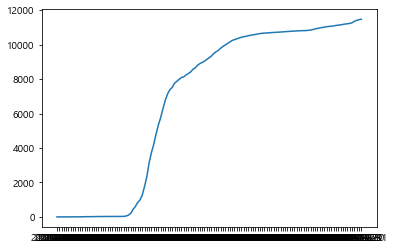

In [6]:
x = corona_conf['date']
y = corona_conf['confirmed']
plt.plot(x,y)
plt.show()

### 사회적 거리두기

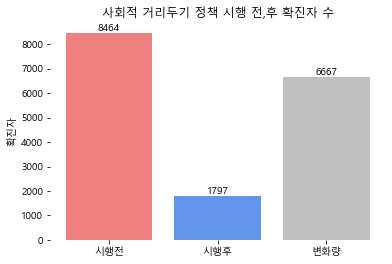

In [7]:
# 사회적 거리두기 정책 시행 날짜
SDC_date = policy_date[policy_date['gov_policy'] == "Social Distancing Campaign"]
SDC_applydate = SDC_date.iloc[0].start_date
SDC_applydate

# 시행날짜 타입 변경(date) => 1달전, 후 날짜 추출
SDC_applydate_date = datetime.strptime(SDC_applydate,"%Y-%m-%d") # 시행날짜 타입 변경
SDC_be_applydate_date = SDC_applydate_date - relativedelta(months= 1) # 30일 전
SDC_aft_applydate_date = SDC_applydate_date + relativedelta(months= 1) # 30일 후
SDC_be_applydate_date,SDC_aft_applydate_date
SDC_be_applydate = str(SDC_be_applydate_date) # 사회적 거리두기 정책 시행 30 일전 날짜
SDC_aft_applydate = str(SDC_aft_applydate_date) # 사회적 거리두기 정책 시행 30 일후 날짜

# 정책 시행일 30일 전 코로나 누적 확진자 수
SDC_be_applydate = SDC_be_applydate[:10]
SDC_policy_be_conf = corona_conf[corona_conf['date'] == SDC_be_applydate]
SDC_policy_be_applyconf = SDC_policy_be_conf.iloc[0].confirmed
SDC_policy_be_applyconf

# 정책 시행일 코로나 누적 확진자 수
SDC_policy_conf = corona_conf[corona_conf['date'] == SDC_applydate]
SDC_policy_applyconf = SDC_policy_conf.iloc[0].confirmed
SDC_policy_applyconf

# 정책 시행일 30일 후 코로나 누적 확진자 수
SDC_aft_applydate = SDC_aft_applydate[:10]
SDC_policy_aft_conf = corona_conf[corona_conf['date'] == SDC_aft_applydate]
SDC_policy_aft_applyconf = SDC_policy_aft_conf.iloc[0].confirmed
SDC_policy_aft_applyconf

# 시행일 전 30일 사이에 확진자 수 =
# 정책 시행일 누적 확진자 수 - 30일 전 누적 확진자 수 
SDC_before_conf = SDC_policy_applyconf - SDC_policy_be_applyconf
SDC_before_conf

# 시행일 후 30일 사이에 확진자 수 =
# 정책 시행일 30일 후 누적 확진자 수 - 정책 시행일 누적 확진자 수
SDC_after_conf = SDC_policy_aft_applyconf - SDC_policy_applyconf
SDC_after_conf

# 시행 전,후 차이량
SDC_change_rate = SDC_before_conf - SDC_after_conf

SDC_confirmed = [SDC_before_conf,SDC_after_conf,SDC_change_rate]
SDC_index = np.arange(len(SDC_confirmed))
SDC_conf_name = ['시행전','시행후','변화량']
SDC_colors = ['lightcoral','cornflowerblue','silver']

plt.bar(SDC_index,SDC_confirmed, color = SDC_colors)
plt.title("사회적 거리두기 정책 시행 전,후 확진자 수")
plt.ylabel("확진자")
plt.xticks(SDC_index,SDC_conf_name)
plt.box(False)

for i,v in enumerate(SDC_index):
    plt.text(v, SDC_confirmed[i], SDC_confirmed[i],
            fontsize = 10,
            horizontalalignment='center',
            verticalalignment='bottom')

plt.show()

### 마스크 5부제

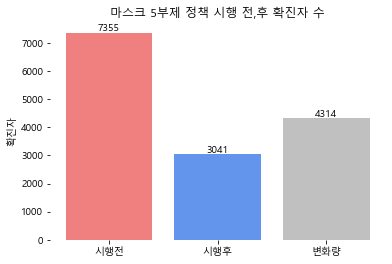

In [8]:
#  마스크 5부제 정책 시행 날짜
MASK_date = policy_date[policy_date['detail'] == "5-day Rotation System"]
MASK_applydate = MASK_date.iloc[0].start_date
MASK_applydate

# 시행날짜 타입 변경(date) => 1달전, 후 날짜 추출
MASK_applydate_date = datetime.strptime(MASK_applydate,"%Y-%m-%d") # 시행날짜 타입 변경
MASK_be_applydate_date = MASK_applydate_date - relativedelta(months= 1) # 30일 전
MASK_aft_applydate_date = MASK_applydate_date + relativedelta(months= 1) # 30일 후
MASK_be_applydate_date,MASK_aft_applydate_date
MASK_be_applydate = str(MASK_be_applydate_date) # 마스크 5부제 정책 시행 날짜 정책 시행 30 일전 날짜
MASK_aft_applydate = str(MASK_aft_applydate_date) # 마스크 5부제 정책 시행 날짜정책 시행 30 일후 날짜

# 정책 시행일 30일 전 코로나 누적 확진자 수
MASK_be_applydate = MASK_be_applydate[:10]
MASK_policy_be_conf = corona_conf[corona_conf['date'] == MASK_be_applydate]
MASK_policy_be_applyconf = MASK_policy_be_conf.iloc[0].confirmed
MASK_policy_be_applyconf

# 정책 시행일 코로나 누적 확진자 수
MASK_policy_conf = corona_conf[corona_conf['date'] == MASK_applydate]
MASK_policy_applyconf = MASK_policy_conf.iloc[0].confirmed
MASK_policy_applyconf

# 정책 시행일 30일 후 코로나 누적 확진자 수
MASK_aft_applydate = MASK_aft_applydate[:10]
MASK_policy_aft_conf = corona_conf[corona_conf['date'] == MASK_aft_applydate]
MASK_policy_aft_applyconf = MASK_policy_aft_conf.iloc[0].confirmed
MASK_policy_aft_applyconf

# 시행일 전 30일 사이에 확진자 수 =
# 정책 시행일 누적 확진자 수 - 30일 전 누적 확진자 수 
MASK_before_conf = MASK_policy_applyconf - MASK_policy_be_applyconf
MASK_before_conf

# 시행일 후 30일 사이에 확진자 수 =
# 정책 시행일 30일 후 누적 확진자 수 - 정책 시행일 누적 확진자 수
MASK_after_conf = MASK_policy_aft_applyconf - MASK_policy_applyconf
MASK_after_conf

# 시행 전,후 차이량
MASK_change_rate = MASK_before_conf - MASK_after_conf

MASK_confirmed = [MASK_before_conf,MASK_after_conf,MASK_change_rate]
MASK_index = np.arange(len(MASK_confirmed))
MASK_conf_name = ['시행전','시행후','변화량']
MASK_colors = ['lightcoral','cornflowerblue','silver']

plt.bar(MASK_index,MASK_confirmed, color = MASK_colors)
plt.title("마스크 5부제 정책 시행 전,후 확진자 수")
plt.ylabel("확진자")
plt.xticks(MASK_index,MASK_conf_name)
plt.box(False)

for i,v in enumerate(MASK_index):
    plt.text(v, MASK_confirmed[i], MASK_confirmed[i],
            fontsize = 10,
            horizontalalignment='center',
            verticalalignment='bottom')
plt.show()



### 해외 입국자 2주 자가격리

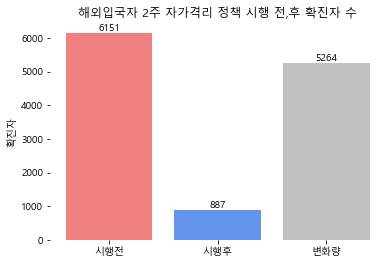

In [9]:
# 해외 입국자 2주 자가격리 정책 시행 날짜
SQ_date = policy_date[policy_date['gov_policy'] == "Mandatory 14-day Self-Quarantine"]
SQ_applydate = SQ_date.iloc[0].start_date
SQ_applydate

# 시행날짜 타입 변경(date) => 1달전, 후 날짜 추출
SQ_applydate_date = datetime.strptime(SQ_applydate,"%Y-%m-%d") # 시행날짜 타입 변경
SQ_be_applydate_date = SQ_applydate_date - relativedelta(months= 1) # 30일 전
SQ_aft_applydate_date = SQ_applydate_date + relativedelta(months= 1) # 30일 후
SQ_be_applydate_date,SQ_aft_applydate_date
SQ_be_applydate = str(SQ_be_applydate_date) # 해외 입국자 2주 자가격리 정책 시행 30 일전 날짜
SQ_aft_applydate = str(SQ_aft_applydate_date) # 해외 입국자 2주 자가격리 정책 시행 30 일후 날짜

# 정책 시행일 30일 전 코로나 누적 확진자 수
SQ_be_applydate = SQ_be_applydate[:10]
SQ_policy_be_conf = corona_conf[corona_conf['date'] == SQ_be_applydate]
SQ_policy_be_applyconf = SQ_policy_be_conf.iloc[0].confirmed
SQ_policy_be_applyconf

# 정책 시행일 코로나 누적 확진자 수
SQ_policy_conf = corona_conf[corona_conf['date'] == SQ_applydate]
SQ_policy_applyconf = SQ_policy_conf.iloc[0].confirmed
SQ_policy_applyconf

# 정책 시행일 30일 후 코로나 누적 확진자 수
SQ_aft_applydate = SQ_aft_applydate[:10]
SQ_policy_aft_conf = corona_conf[corona_conf['date'] == SQ_aft_applydate]
SQ_policy_aft_applyconf = SQ_policy_aft_conf.iloc[0].confirmed
SQ_policy_aft_applyconf

# 시행일 전 30일 사이에 확진자 수 =
# 정책 시행일 누적 확진자 수 - 30일 전 누적 확진자 수 
SQ_before_conf = SQ_policy_applyconf - SQ_policy_be_applyconf
SQ_before_conf

# 시행일 후 30일 사이에 확진자 수 =
# 정책 시행일 30일 후 누적 확진자 수 - 정책 시행일 누적 확진자 수
SQ_after_conf = SQ_policy_aft_applyconf - SQ_policy_applyconf
SQ_after_conf

# 시행 전,후 차이량
SQ_change_rate = SQ_before_conf - SQ_after_conf

SQ_confirmed = [SQ_before_conf,SQ_after_conf,SQ_change_rate]
SQ_index = np.arange(len(SQ_confirmed))
SQ_conf_name = ['시행전','시행후','변화량']
SQ_colors = ['lightcoral','cornflowerblue','silver']

plt.bar(SQ_index,SQ_confirmed, color = SQ_colors)
plt.title("해외입국자 2주 자가격리 정책 시행 전,후 확진자 수")
plt.ylabel("확진자")
plt.xticks(SQ_index,SQ_conf_name)
plt.box(False)

for i,v in enumerate(SQ_index):
    plt.text(v, SQ_confirmed[i], SQ_confirmed[i],
            fontsize = 10,
            horizontalalignment='center',
            verticalalignment='bottom')
plt.show()

### 특별 출입국 절차 

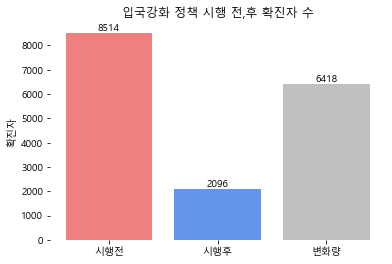

In [10]:
#특별 출입국 절차 정책 시행 날짜
SIP_date = policy_date[policy_date['detail'] == "from all the countries"]
SIP_date = SIP_date[SIP_date['gov_policy']=="Special Immigration Procedure"]
# SIP_date
SIP_applydate = SIP_date.iloc[0].start_date
SIP_applydate

# 시행날짜 타입 변경(date) => 1달전, 후 날짜 추출
SIP_applydate_date = datetime.strptime(SIP_applydate,"%Y-%m-%d") # 시행날짜 타입 변경
SIP_be_applydate_date = SIP_applydate_date - relativedelta(months= 1) # 30일 전
SIP_aft_applydate_date = SIP_applydate_date + relativedelta(months= 1) # 30일 후
SIP_be_applydate_date,SIP_aft_applydate_date
SIP_be_applydate = str(SIP_be_applydate_date) # 입국강화 정책 시행 30 일전 날짜
SIP_aft_applydate = str(SIP_aft_applydate_date) # 사회적 거리두기 정책 시행 30 일후 날짜

# 정책 시행일 30일 전 코로나 누적 확진자 수
SIP_be_applydate = SIP_be_applydate[:10]
SIP_policy_be_conf = corona_conf[corona_conf['date'] == SIP_be_applydate]
SIP_policy_be_applyconf = SIP_policy_be_conf.iloc[0].confirmed
SIP_policy_be_applyconf

# 정책 시행일 코로나 누적 확진자 수
SIP_policy_conf = corona_conf[corona_conf['date'] == SIP_applydate]
SIP_policy_applyconf = SIP_policy_conf.iloc[0].confirmed
SIP_policy_applyconf

# 정책 시행일 30일 후 코로나 누적 확진자 수
SIP_aft_applydate = SIP_aft_applydate[:10]
SIP_policy_aft_conf = corona_conf[corona_conf['date'] == SIP_aft_applydate]
SIP_policy_aft_applyconf = SIP_policy_aft_conf.iloc[0].confirmed
SIP_policy_aft_applyconf

# 시행일 전 30일 사이에 확진자 수 =
# 정책 시행일 누적 확진자 수 - 30일 전 누적 확진자 수 
SIP_before_conf = SIP_policy_applyconf - SIP_policy_be_applyconf
SIP_before_conf

# 시행일 후 30일 사이에 확진자 수 =
# 정책 시행일 30일 후 누적 확진자 수 - 정책 시행일 누적 확진자 수
SIP_after_conf = SIP_policy_aft_applyconf - SIP_policy_applyconf
SIP_after_conf

# 시행 전,후 차이량
SIP_change_rate = SIP_before_conf - SIP_after_conf

SIP_confirmed = [SIP_before_conf,SIP_after_conf,SIP_change_rate]
SIP_index = np.arange(len(SIP_confirmed))
SIP_conf_name = ['시행전','시행후','변화량']
SIP_colors = ['lightcoral','cornflowerblue','silver']

plt.bar(SIP_index,SIP_confirmed, color = SIP_colors)
plt.title("입국강화 정책 시행 전,후 확진자 수")
plt.ylabel("확진자")
plt.xticks(SIP_index,SIP_conf_name)
plt.box(False)

for i,v in enumerate(SIP_index):
    plt.text(v, SIP_confirmed[i], SIP_confirmed[i],
            fontsize = 10,
            horizontalalignment='center',
            verticalalignment='bottom')

plt.show()

### 학교 및 어린이집 개학 연기

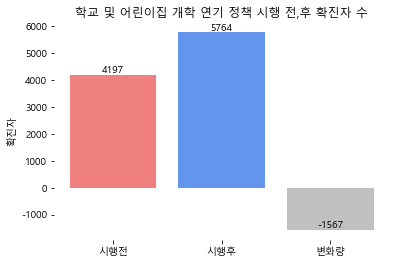

In [11]:
# 학교 및 어린이집 개학 연기 정책 시행 날짜
SOD_date = policy_date[policy_date['gov_policy'] == "School Opening Delay"]
SOD_applydate = SOD_date.iloc[0].start_date

# 시행날짜 타입 변경(date) => 1달전, 후 날짜 추출
SOD_applydate_date = datetime.strptime(SOD_applydate,"%Y-%m-%d") # 시행날짜 타입 변경
SOD_be_applydate_date = SOD_applydate_date - relativedelta(months= 1) # 30일 전
SOD_aft_applydate_date = SOD_applydate_date + relativedelta(months= 1) # 30일 후
SOD_be_applydate_date,SOD_aft_applydate_date
SOD_be_applydate = str(SOD_be_applydate_date) # 사회적 거리두기 정책 시행 30 일전 날짜
SOD_aft_applydate = str(SOD_aft_applydate_date) # 사회적 거리두기 정책 시행 30 일후 날짜

# 정책 시행일 30일 전 코로나 누적 확진자 수
SOD_be_applydate = SOD_be_applydate[:10]
# SOD_be_applydate
SOD_policy_be_conf = corona_conf[corona_conf['date'] == SOD_be_applydate]
SOD_policy_be_conf
SOD_policy_be_applyconf = SOD_policy_be_conf.iloc[0].confirmed
SOD_policy_be_applyconf

# 정책 시행일 코로나 누적 확진자 수
SOD_policy_conf = corona_conf[corona_conf['date'] == SOD_applydate]
SOD_policy_applyconf = SOD_policy_conf.iloc[0].confirmed
SOD_policy_applyconf

# 정책 시행일 30일 후 코로나 누적 확진자 수
SOD_aft_applydate = SOD_aft_applydate[:10]
SOD_policy_aft_conf = corona_conf[corona_conf['date'] == SOD_aft_applydate]
SOD_policy_aft_applyconf = SOD_policy_aft_conf.iloc[0].confirmed
SOD_policy_aft_applyconf

# 시행일 전 30일 사이에 확진자 수 =
# 정책 시행일 누적 확진자 수 - 30일 전 누적 확진자 수 
SOD_before_conf = SOD_policy_applyconf - SOD_policy_be_applyconf
SOD_before_conf

# 시행일 후 30일 사이에 확진자 수 =
# 정책 시행일 30일 후 누적 확진자 수 - 정책 시행일 누적 확진자 수
SOD_after_conf = SOD_policy_aft_applyconf - SOD_policy_applyconf
SOD_after_conf

# 시행 전,후 차이량
SOD_change_rate = SOD_before_conf - SOD_after_conf

SOD_confirmed = [SOD_before_conf,SOD_after_conf,SOD_change_rate]
SOD_index = np.arange(len(SOD_confirmed))
SOD_conf_name = ['시행전','시행후','변화량']
SOD_colors = ['lightcoral','cornflowerblue','silver']

plt.bar(SOD_index,SOD_confirmed, color = SOD_colors)
plt.title("학교 및 어린이집 개학 연기 정책 시행 전,후 확진자 수")
plt.ylabel("확진자")
plt.xticks(SOD_index,SOD_conf_name)
plt.box(False)

for i,v in enumerate(SOD_index):
    plt.text(v, SOD_confirmed[i], SOD_confirmed[i],
            fontsize = 10,
            horizontalalignment='center',
            verticalalignment='bottom')

plt.show()

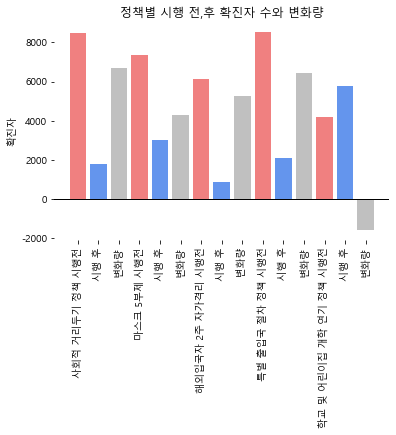

In [12]:
# 정책별 시행 전,후 확진자 수 및 변화량
confirmed = [SDC_before_conf,SDC_after_conf,SDC_change_rate,
             MASK_before_conf,MASK_after_conf,MASK_change_rate,
             SQ_before_conf,SQ_after_conf,SQ_change_rate,
             SIP_before_conf,SIP_after_conf,SIP_change_rate,
             SOD_before_conf,SOD_after_conf,SOD_change_rate
            ]
index = np.arange(len(confirmed))
conf_name = ['사회적 거리두기 정책 시행전','시행 후','변화량',
             '마스크 5부제 시행전','시행 후','변화량' ,
             '해외입국자 2주 자가격리 시행전','시행 후',' 변화량',            
             '특별 출입국 절차 정책 시행전',' 시행 후','변화량',
             '학교 및 어린이집 개학 연기 정책 시행전','시행 후','변화량'
            ]
colors = ['lightcoral','cornflowerblue','silver']

plt.bar(index,confirmed, color = colors)
plt.title("정책별 시행 전,후 확진자 수와 변화량")
plt.ylabel("확진자")
plt.xticks(index,conf_name, rotation=90)
plt.box(False)
plt.axhline(y=0, color='black', linewidth=1)
plt.show()

In [18]:
# 정책별 시행후  확진자 변화율
SDC_change_per = SDC_change_rate / SDC_before_conf
MASK_change_per = MASK_change_rate / MASK_before_conf
SQ_change_per = SQ_change_rate / SQ_before_conf
SIP_change_per = SIP_change_rate / SIP_before_conf
SOD_change_per = SOD_change_rate / SOD_before_conf

SDC_change_per = SDC_change_per * 100
MASK_change_per = MASK_change_per * 100
SQ_change_per = SQ_change_per * 100
SIP_change_per = SIP_change_per * 100
SOD_change_per = SOD_change_per * 100

total_change_rate = pd.DataFrame([SDC_change_per,MASK_change_per,SQ_change_per,
                                  SIP_change_per,SOD_change_per],
                                  index=['사회적 거리두기',
                                         '마스크 공공5부제',
                                         '해외입국자 2주 자가격리',
                                         '특별 출입국 절차',
                                         '학교 및 어린이집 개학(강) 연기'],
                                 columns =['변화율'])


,변화율
사회적 거리두기,78.768904
마스크 공공5부제,58.653977
해외입국자 2주 자가격리,85.579581
특별 출입국 절차,75.381724
학교 및 어린이집 개학(강) 연기,-37.336193


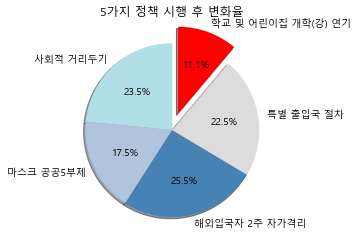

In [14]:
plt.pie(abs(total_change_rate['변화율']),
        colors=["powderblue","lightsteelblue","steelblue", 'gainsboro','r'], 
        labels=['사회적 거리두기','마스크 공공5부제','해외입국자 2주 자가격리', 
                '특별 출입국 절차','학교 및 어린이집 개학(강) 연기'],
        autopct='%0.1f%%', 
        explode=[0,0,0,0,0.2],
        shadow=True, 
        startangle=90
                                 )
plt.title("5가지 정책 시행 후 변화율")
plt.show()

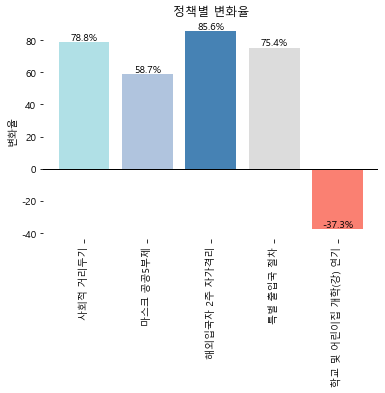

In [15]:
total_confirmed_rate = [SDC_change_per,MASK_change_per,SQ_change_per,SIP_change_per,SOD_change_per]
total_index = np.arange(len(total_confirmed_rate))
total_conf_name = ['사회적 거리두기','마스크 공공5부제','해외입국자 2주 자가격리','특별 출입국 절차','학교 및 어린이집 개학(강) 연기']
colors = ["powderblue","lightsteelblue","steelblue", 'gainsboro','salmon']
plt.bar(total_index,total_confirmed_rate,color = colors)
plt.title("정책별 변화율")
plt.ylabel("변화율")
plt.xticks(total_index,total_conf_name,rotation=90)
plt.axhline(y=0, color='black', linewidth=1)
plt.box(False)

for i,v in enumerate(total_index):
    plt.text(v, total_confirmed_rate[i], "{}%".format(round(total_confirmed_rate[i],1)),
            fontsize = 10, 
            horizontalalignment='center',
            verticalalignment='bottom')
plt.show()

In [16]:
total_change_rate["시행일"]=[SDC_applydate,MASK_applydate,SQ_applydate,SIP_applydate,
                             SOD_applydate]
total_change_rate.sort_values(by=['시행일'],ascending=True)

,변화율,시행일
학교 및 어린이집 개학(강) 연기,-37.336193,2020-03-02
마스크 공공5부제,58.653977,2020-03-09
특별 출입국 절차,75.381724,2020-03-19
사회적 거리두기,78.768904,2020-03-22
해외입국자 2주 자가격리,85.579581,2020-04-01


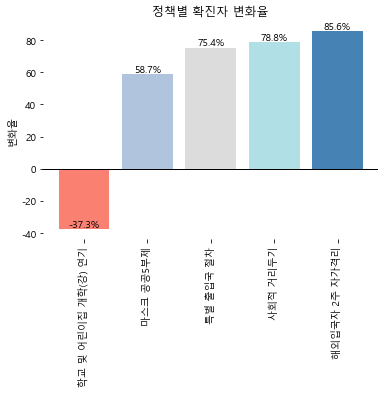

In [17]:
total_confirmed_rate = [SOD_change_per,MASK_change_per,SIP_change_per,SDC_change_per,SQ_change_per,]
total_index = np.arange(len(total_confirmed_rate))
total_conf_name = ['학교 및 어린이집 개학(강) 연기','마스크 공공5부제','특별 출입국 절차','사회적 거리두기','해외입국자 2주 자가격리']
colors = ['salmon',"lightsteelblue",'gainsboro',"powderblue","steelblue"]
plt.bar(total_index,total_confirmed_rate,color = colors)
plt.title("정책별 확진자 변화율")
plt.ylabel("변화율")
plt.xticks(total_index,total_conf_name,rotation=90)
plt.axhline(y=0, color='black', linewidth=1)
plt.box(False)

for i,v in enumerate(total_index):
    plt.text(v, total_confirmed_rate[i], "{}%".format(round(total_confirmed_rate[i],1)),
            fontsize = 10, 
            horizontalalignment='center',
            verticalalignment='bottom')
plt.show()